<a href="https://colab.research.google.com/github/khou128/QM2/blob/main/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Word Frequency Analysis for Film Critic Reviews

First, I will visualise word frequency analysis of critic reviews for Avatar:

In [2]:
import pandas as pd

In [7]:
url = 'https://raw.githubusercontent.com/khou128/QM2/main/critics%20for%20Avatar.csv'
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of           display-name          publication  \
0         Brian Eggert    Deep Focus Review   
1            Zach Pope    Zach Pope Reviews   
2     Douglas Davidson  Elements of Madness   
3         Allison Rose          FlickDirect   
4         Matt Brunson          Film Frenzy   
..                 ...                  ...   
307     Kirk Honeycutt   Hollywood Reporter   
308  Chris Hewitt (UK)      Empire Magazine   
309          Anna Keir     Independent (UK)   
310          Wendy Ide           Times (UK)   
311          The Sneak         The Sun (UK)   

                                           review-text  \
0    To be sure, this is an engaging experience in ...   
1    STUNNING epic.  Zoe Saldana performance… A fan...   
2    It’s the world of Pandora married to the groun...   
3    Cameron is a master filmmaker whose movies wil...   
4    While the visuals might rate four stars, the s...   
..                                                 ...   

In [8]:
print(df['review-text'])

0      To be sure, this is an engaging experience in ...
1      STUNNING epic.  Zoe Saldana performance… A fan...
2      It’s the world of Pandora married to the groun...
3      Cameron is a master filmmaker whose movies wil...
4      While the visuals might rate four stars, the s...
                             ...                        
307    The screen is alive with more action and the s...
308    It's a world, not to give too much away, that ...
309    There are myriad moments of beauty and of poig...
310    Avatar is an overwhelming, immersive spectacle...
311    It's a 3D movie people will look back on in ye...
Name: review-text, Length: 312, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-235e9a9e0eea>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


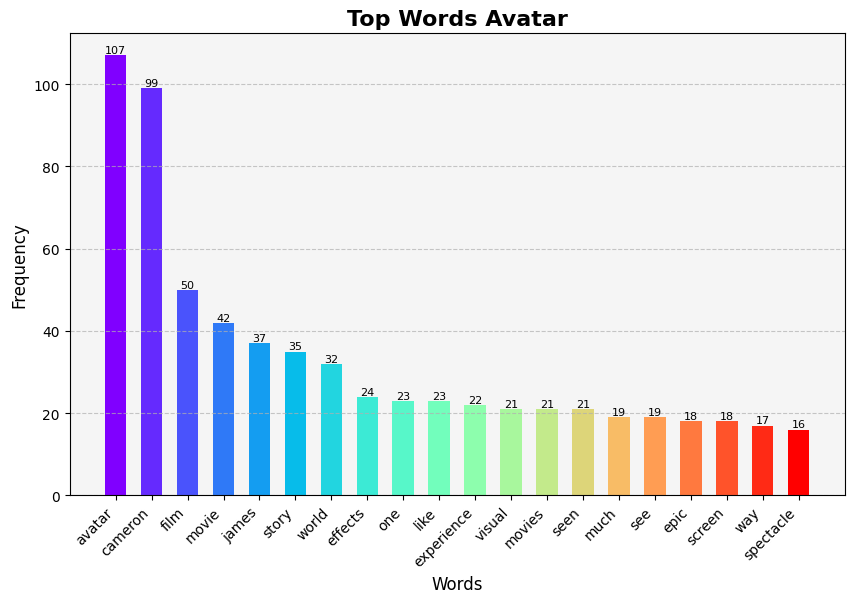

In [9]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib import cm

text_data = ' '.join(df['review-text'].dropna())

words = word_tokenize(text_data)

stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

freq_dist = FreqDist(words)

top_words = freq_dist.most_common(20)

colormap = cm.get_cmap('rainbow', len(top_words))

plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words Avatar', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.gca().set_facecolor('#F5F5F5')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()


# 2. Sentiment Analysis of Critic Reviews

In [ ]:
#Now time for sentiment analysis...
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob

In [ ]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [ ]:
text_of_77th_row = df.loc[76, 'review-text']

# apply the NLP pipeline to this text.
doc = nlp(text_of_77th_row)

print(text_of_77th_row)
print('Polarity: ', doc._.blob.polarity)
print('Subjectivity: ', doc._.blob.subjectivity)
print('Assessments: ', doc._.blob.sentiment_assessments.assessments)

Worthington and Saldana provide enough wattage to keep the film's human center alive and beating, while Cameron wraps their story in an armature of generally impressive 3D attractions as well as a righteousness that's touching yet all too simplistic
Polarity:  0.14285714285714285
Subjectivity:  0.4428571428571429
Assessments:  [(['enough'], 0.0, 0.5, None), (['human'], 0.0, 0.1, None), (['center'], -0.1, 0.1, None), (['alive'], 0.1, 0.4, None), (['generally', 'impressive'], 1.0, 1.0, None), (['touching'], 0.5, 0.5, None), (['simplistic'], -0.5, 0.5, None)]


In [ ]:
#Further, an overall score of the polarity and subjectivity...
from textblob import TextBlob
import pandas as pd

df['Polarity'] = df['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df['Subjectivity'] = df['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Overall sentiment analysis for all texts
try:
    average_polarity = df['Polarity'].mean()
    average_subjectivity = df['Subjectivity'].mean()

    print('Overall Sentiment Analysis:')
    print('Average Polarity: ', average_polarity)
    print('Average Subjectivity: ', average_subjectivity)
except KeyError:
    print(f"Error: 'Polarity' or 'Subjectivity' columns not found in the DataFrame.")

Overall Sentiment Analysis:
Average Polarity:  0.18059390301745212
Average Subjectivity:  0.49443683768832575


From above we can see that the average polarity is positive, demonstrating overall the reviews for Avatar are expressing positive sentiment. The average subjectivity is just below 0.5, showing a neutral score for the level of subjectivity. (not so subjective)

# 3. Heatmap for Taglines and Overviews

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
df1 = pd.read_csv('tmdb_5000_movies.csv')
df1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
df2= df1.sort_values(by='popularity', ascending=False)
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,426067,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],[],1990-01-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot spot where Satan's waitin'.,Midnight Cabaret,0.0,0
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0
4727,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,65448,"[{""id"": 378, ""name"": ""prison""}, {""id"": 209476,...",en,Penitentiary,A hitchhiker named Martel Gordone gets in a fi...,0.001117,[],[],1979-12-01,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"There's only one way out, and 100 fools stand ...",Penitentiary,4.9,8
3361,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 28, ""nam...",NaN,77156,[],en,Alien Zone,A man who is having an affair with a married w...,0.000372,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1978-11-22,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""En

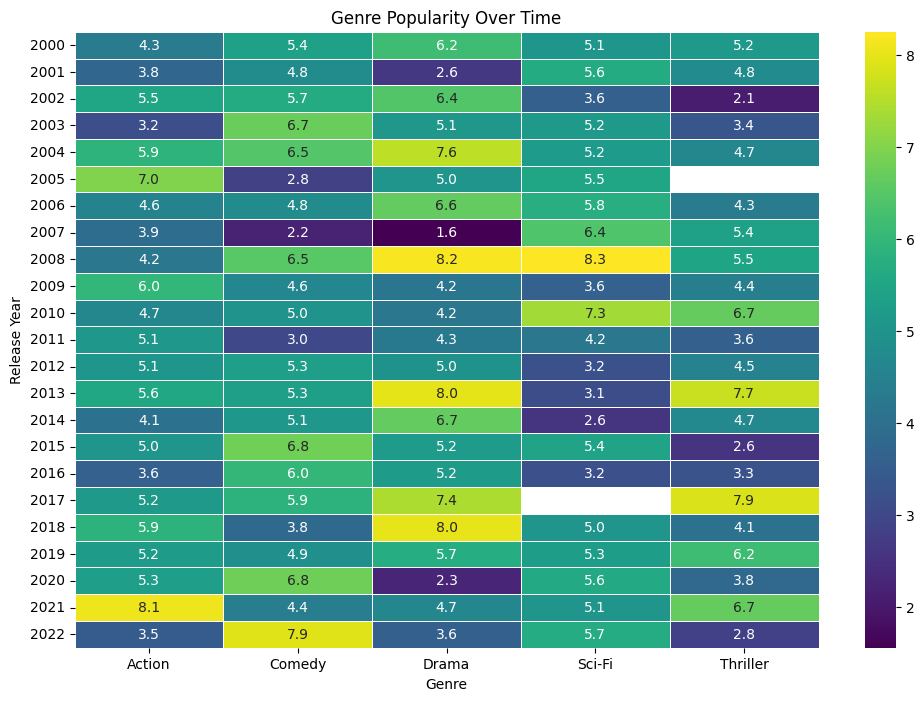

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
np.random.seed(42)
n_movies = 500
release_years = np.random.choice(range(2000, 2023), n_movies)
genres = np.random.choice(['Action', 'Comedy', 'Drama', 'Thriller', 'Sci-Fi'], n_movies)
popularity_scores = np.random.uniform(0, 10, n_movies)

df = pd.DataFrame({
    'Release_Year': release_years,
    'Genre': genres,
    'Popularity_Score': popularity_scores
})

# Pivot the data to create a heatmap-friendly format
heatmap_data = df.pivot_table(index='Release_Year', columns='Genre', values='Popularity_Score', aggfunc='mean')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Genre Popularity Over Time')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.show()


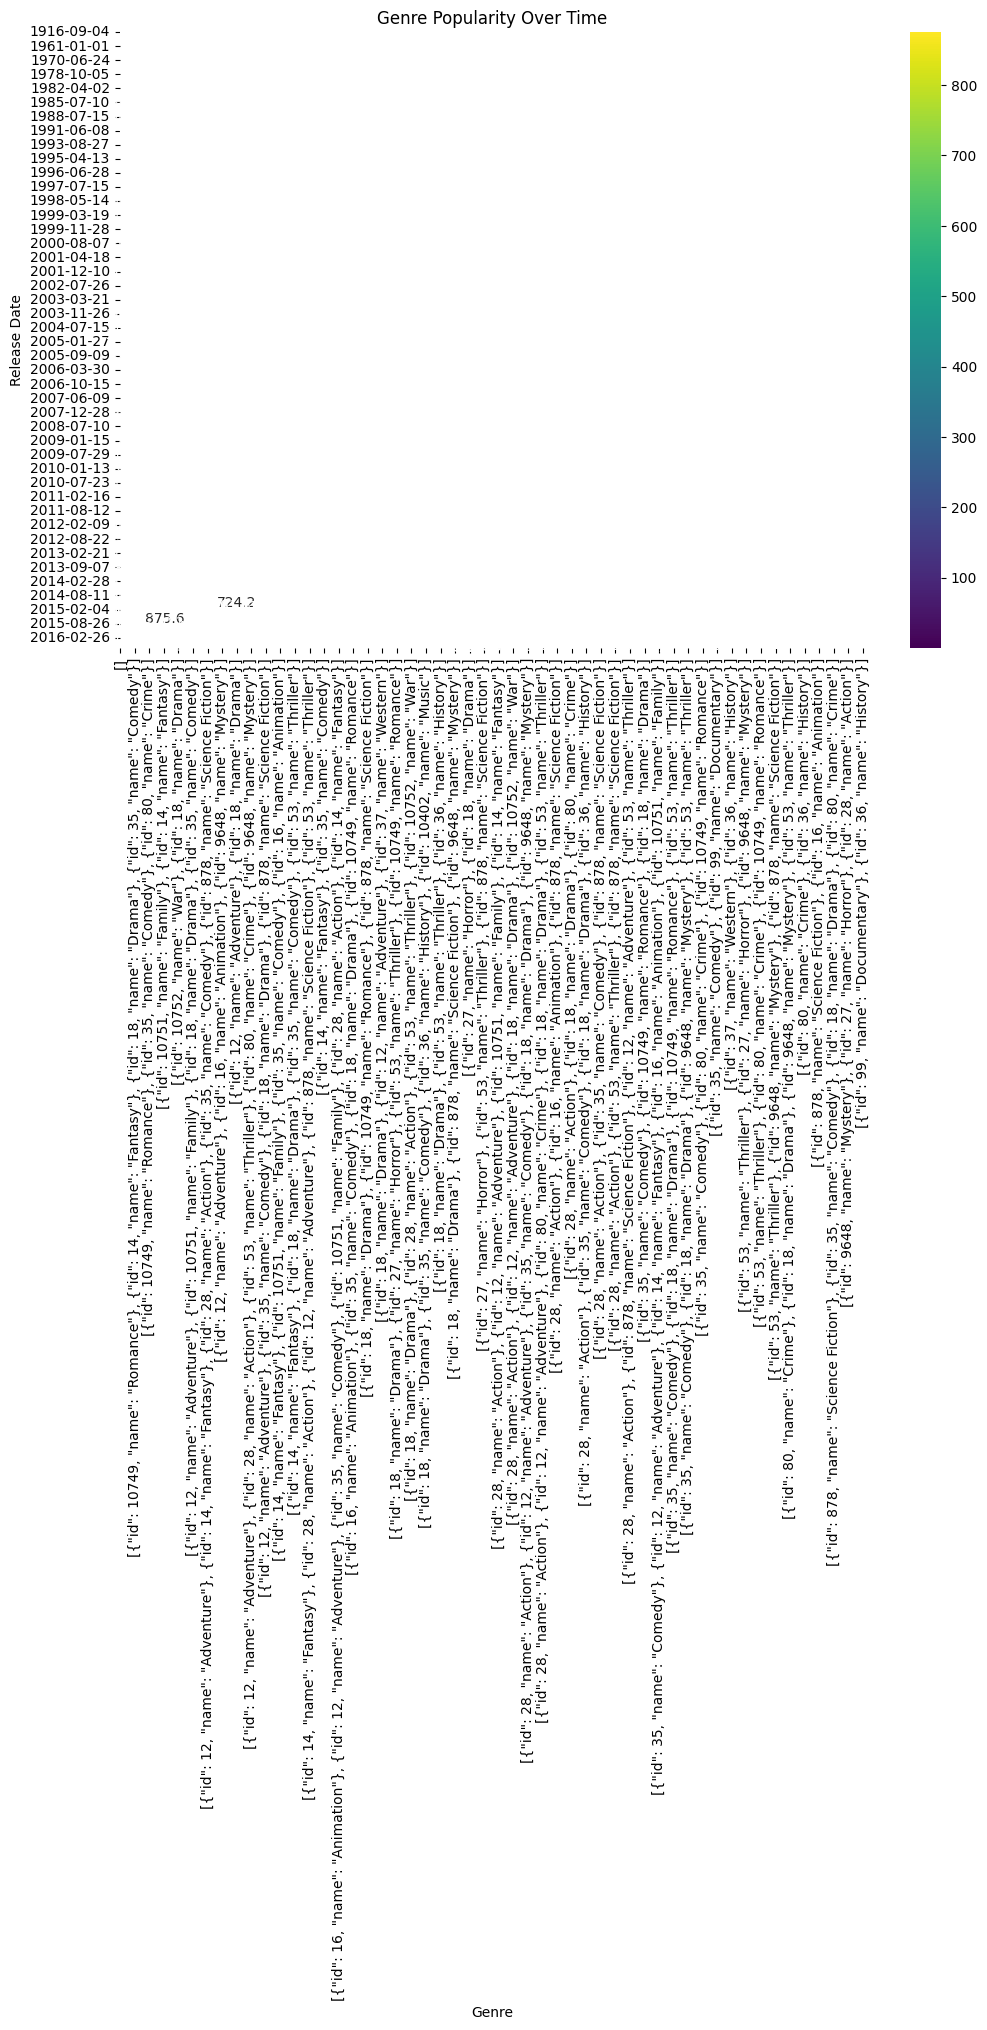

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame with columns 'genres', 'release_date', and 'popularity'

# Pivot the data to create a heatmap-friendly format
heatmap_data = df1.pivot_table(index='release_date', columns='genres', values='popularity', aggfunc='mean')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Genre Popularity Over Time')
plt.xlabel('Genre')
plt.ylabel('Release Date')
plt.show()


<ipython-input-59-8f1138a4c18e>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['overview'] = df1['overview'].str.replace('[^\w\s]', '')  # Remove punctuation


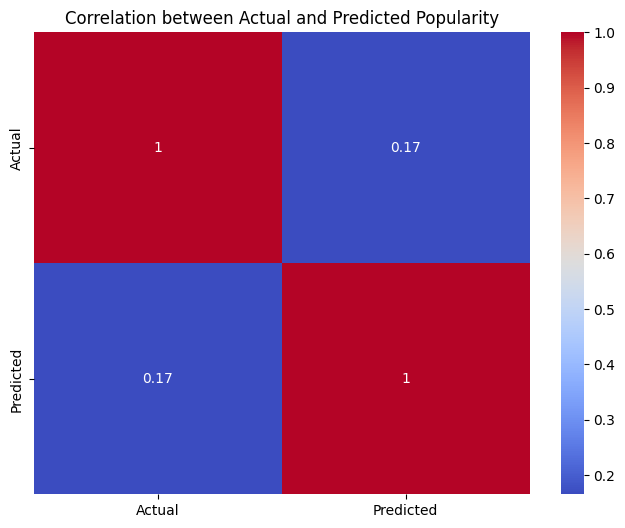

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess the text data
df1['overview'] = df1['overview'].fillna('')  # Handle missing values
df1['overview'] = df1['overview'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))  # Convert to lowercase
df1['overview'] = df1['overview'].str.replace('[^\w\s]', '')  # Remove punctuation

# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df1['overview'])

# Define the target variable
y = df1['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you may need to use appropriate evaluation metrics based on your problem)

# Create a heatmap to visualize the correlation between predicted popularity and actual popularity
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Actual and Predicted Popularity')
plt.show()
